**Darija Comments Sentiment Anlysis** <br>
*Work Notbook Overview*

Author: MOTASSIM Hamza <br>
Suppervision: <br>


1. Introduction
  1. Abstract
  2. Introduction
  3. Related Works
2. Dataset
  1. Data Collection
  2. Data Analyzing
  3. Data Cleaning I
  4. Data Cleaning II
3. Training
  1. ML Models
  2. DL Models
  3. LLM's
4. Deployment
  1. Website
  2. Web hosting / Domain Name
  3. Model Deployment
5. Additional
  1. References
  2. Links
  3. Utils


# Import Datasets

* **df1**: Moroccan Arabic Sentiment Analysis Corpus: 2k tweets [review,rating].csv (has been .arff but modified to .csv file)
* **df2**: Arabic Sentiment Tweets Dataset 10k tweets [review'tab'rating].txt
* **df3**: Offensive Moroccan Comments Dataset -Part1 6.4k text [,comment,off].csv
* **df4**: Offensive Moroccan Comments Dataset -Part2 1.6k text [,comment,off].csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load different datasets to analyze each one and merge them all in one dataset
df1 = pd.read_csv('Dataset/data1.csv')
df2 = pd.read_csv('Dataset/data2.txt', sep='\t', header=None, names=['text', 'label'])
df3 = pd.read_csv('Dataset/data3.csv')
df4 = pd.read_csv('Dataset/data4.csv')

# Analyze DataFrames

In [ ]:
def analyze_dataframe(df, title='Data Analysis'):
    """
    Analyze a Pandas DataFrame.

    Parameters:
    - df: Pandas DataFrame
    - title: Title for the analysis

    Returns:
    - None (prints analysis summary)
    """

    print(f"\n{title} Analysis:")
    print("===================================")
    print(f"Length: {len(df)} rows")
    print(f"Columns: {df.columns}\n")
    print("Descriptive Statistics:")
    print(df.describe())


def plot_dataframe(df, column_label, title='Data Analysis'):
    """
    PLot a Pandas DataFrame.

    Parameters:
    - df: Pandas DataFrame
    - column_label: column to plot count
    - title: Title for the analysis

    Returns:
    - None (plots a dataframe)
    """

    print(f"\n{title} Plot:")
    print("===================================")
    df[column_label].value_counts().plot(kind='bar')
    plt.title('Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()




**==> DF1**

In [ ]:
df1.head()

,tweet,label
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,pos
1,منتوج رائع وثمن مناسب ....جميل,pos
2,كلنا ابن كيران لمتافق معايا يدير جيم,pos
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,pos
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,pos



DataFrame 1 Analysis:
Length: 2000 rows
Columns: Index(['tweet', 'label'], dtype='object')

Descriptive Statistics:
                                          tweet label
count                                      2000  2000
unique                                     1975     2
top     وكنفتخر بكل رجال ونساء العدالة والتنمية   pos
freq                                          2  1000

DataFrame 1 Plot:


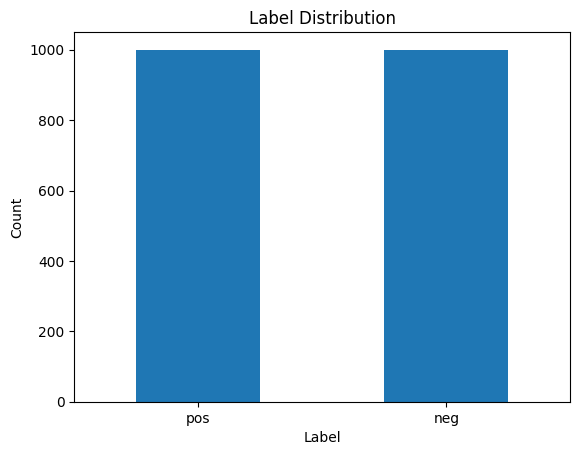

In [ ]:
analyze_dataframe(df1, title='DataFrame 1')
plot_dataframe(df1, 'label', title='DataFrame 1')

**==> DF2**

In [ ]:
df2.head()

,text,label
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استق...,OBJ
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,POS
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,NEG
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,OBJ
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,NEUTRAL



DataFrame 2 Analysis:
Length: 9694 rows
Columns: Index(['text', 'label'], dtype='object')

Descriptive Statistics:
                                                     text label
count                                                9694  9694
unique                                               9690     4
top     الإخوان يطلقون طفايات الحريق للإيحاء بإلقاء ال...   OBJ
freq                                                    2  6470

DataFrame 2 Plot:


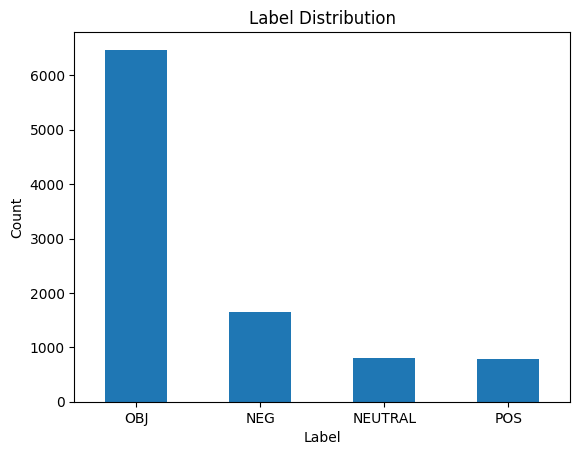

In [ ]:
analyze_dataframe(df2, title='DataFrame 2')
plot_dataframe(df2, 'label', title='DataFrame 2')

**==> DF3**

In [ ]:
df3.head()

,Unnamed: 0,comment,off
0,2908,فنانين الكبت والفساد .عقلية جنسية لا غير. العف...,1
1,1055,الدعارة هربت منها في المحمدية و سكنت في بوزنيق...,1
2,181,كون غير خريتي و مدرتيش هادشي,1
3,4313,لا حول ولا قوة الا بالله العلي العظيم لا حول و...,0
4,228,الله يرحم الوالدين عندي مشكل كبيييير و محتاجة ...,0



DataFrame 3 Analysis:
Length: 6419 rows
Columns: Index(['Unnamed: 0', 'comment', 'off'], dtype='object')

Descriptive Statistics:
        Unnamed: 0          off
count  6419.000000  6419.000000
mean   3994.863842     0.532170
std    2304.167917     0.499003
min       0.000000     0.000000
25%    2000.000000     0.000000
50%    3980.000000     1.000000
75%    5979.500000     1.000000
max    8022.000000     1.000000

DataFrame 3 Plot:


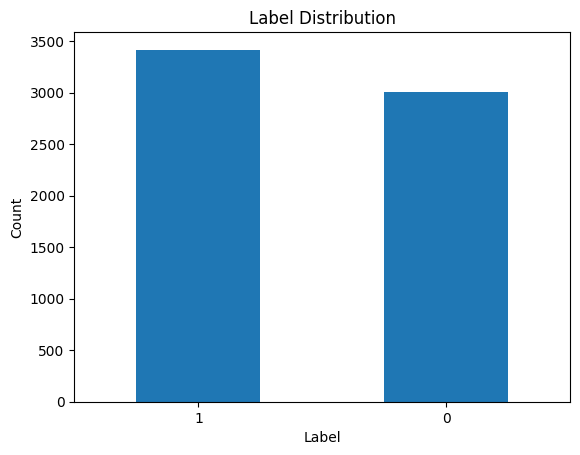

In [ ]:
analyze_dataframe(df3, title='DataFrame 3')
plot_dataframe(df3, 'off', title='DataFrame 3')

**==> DF4**

In [ ]:
df4.head()

,Unnamed: 0,comment,off
0,6139,تبهديل تسؤلو البنات في الشارع,1
1,3447,انا مستعد بي مسعدة بسيطة في وجه اللة ربي يادير...,0
2,6844,لاحول ولاقوة الا بالله العلي العظيم,0
3,2512,حتى هاد العائلة لي جالس وسط منهوم خص يدلمهوم ا...,1
4,2000,لا حول ولا قوة الا بالله اش هذا المستوى اصلا ر...,1



DataFrame 4 Analysis:
Length: 1605 rows
Columns: Index(['Unnamed: 0', 'comment', 'off'], dtype='object')

Descriptive Statistics:
        Unnamed: 0          off
count  1605.000000  1605.000000
mean   4078.034268     0.553271
std    2364.607793     0.497309
min      10.000000     0.000000
25%    2031.000000     0.000000
50%    4140.000000     1.000000
75%    6139.000000     1.000000
max    8023.000000     1.000000

DataFrame 4 Plot:


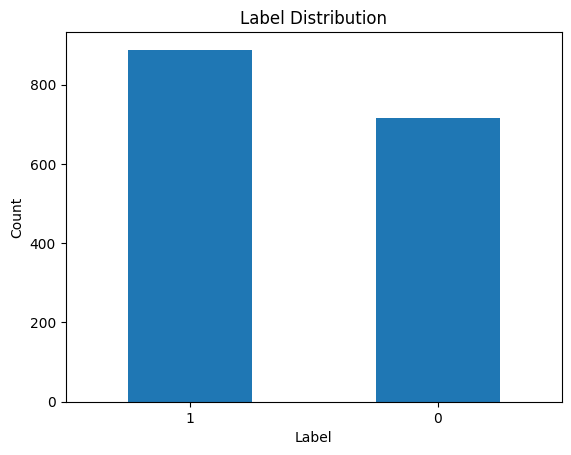

In [ ]:
analyze_dataframe(df4, title='DataFrame 4')
plot_dataframe(df4, 'off', title='DataFrame 4')

# Clean DataFrames

In [ ]:
def basic_cleaning(df, target):
    """
    Basic cleaning for a DataFrame.

    Parameters:
    - df: Pandas DataFrame
    - target: Name of the column containing text data

    Returns:
    - Cleaned Pandas DataFrame
    """

    df = df.dropna(subset=[target])
    df = df[df[target] != '']
    df = df.drop_duplicates()

    return df


def encode_dataframe(df, target, mapping):
    """
    Encodes label column given a dictionary

    Parameters:
    - df: Pandas DataFrame
    - target: Column to encode
    - mapping: Dictionary contains values to decode from to

    Returns:
    - Encoded DataFrame
    """

    df[target] = df[target].map(mapping)
    return df



def remove_class(df, label, target):
    """
    Drop rows where label column contains target

    Parameters:
    - df: Pandas DataFrame
    - label: Label column
    - target: Class to remove

    Returns:
    - DataFrame without removed class
    """

    df = df[~df[label].str.contains(target)]
    return df


def remove_column(df, column):
    """
    Drops a specified column from the DataFrame.

    Parameters:
    - df: Pandas DataFrame
    - column: Name of the column to be dropped

    Returns:
    - DataFrame without removed column
    """
    return df.drop(column, axis=1, inplace=False)


def rename_columns(df, mapping):
    """
    Renames columns in the DataFrame.

    Parameters:
    - df: Pandas DataFrame
    - mapping: Dictionary specifying the old and new column names

    Returns:
    - DataFrame with renamed columns
    """
    return df.rename(columns=mapping, inplace=False)


def balance_dataframe(df, target, method, random_seed=42):
    """
    Balence the dataframe by [under-sampling the majority/oversampling the minority] class

    Parameters:
    - df: Pandas DataFrame
    - target: Name of the target column to balance
    - method: Balancing method ('over or 1', 'under or -1')
    - random_seed: Random seed for reproducibility

    Returns:
    - Balanced Pandas DataFrame
    """


    # Find the class with the minimum / maximum number of samples
    minority_class = df[target].value_counts().idxmin()
    majority_class = df[target].value_counts().idxmax()

    # Separate the DataFrame into two based on the target class
    df_minority = df[df[target] == minority_class]
    df_majority = df[df[target] == majority_class]

    if method == 'over' or method == 1:
        # randomly duplicating rows
        oversample_factor = int(len(df_majority) / len(df_minority))
        df_minority_resampled = pd.concat([df_minority] * oversample_factor, ignore_index=True)
        df_balanced = pd.concat([df_majority, df_minority_resampled], ignore_index=True)
    elif method == 'under' or method == -1:
        # randomly removing rows
        under_sample_size = min(len(df_minority), len(df_majority))
        df_majority_undersampled = df_majority.sample(n=under_sample_size, random_state=random_seed)
        df_balanced = pd.concat([df_majority_undersampled, df_minority], ignore_index=True)
    else:
        raise ValueError("Invalid balancing method. Use 'over/1' or 'under/-1'")

    return df_balanced




The target is to detect negative comments, so being a positive or neutral comment is good, however negative comments aren't good and should be detected!
Class 1: Negative comments
Class 0: Positive/Neutral comments

**==> DF1**

In [ ]:
df1 = rename_columns(df1, {'tweet': 'text', 'label': 'class'})
df1 = encode_dataframe(df1, 'class', {'pos': '0', 'neg': '1'})

**==> DF2**

In [ ]:
df2 = rename_columns(df2, {'label': 'class'})
df2 = basic_cleaning(df2, 'text')
df2 = remove_class(df2, 'class', 'OBJ')
df2 = encode_dataframe(df2, 'class', {'NEUTRAL': '0', 'POS': '0', 'NEG': '1'})
df2 = balance_dataframe(df2, 'class', -1)


DataFrame 2 Analysis:
Length: 3164 rows
Columns: Index(['text', 'class'], dtype='object')

Descriptive Statistics:
                                                     text class
count                                                3164  3164
unique                                               3164     2
top     الكاتب الامريكي ناعوم تشومسكي المخرج الامريكيً...     1
freq                                                    1  1582

DataFrame 2 Plot:


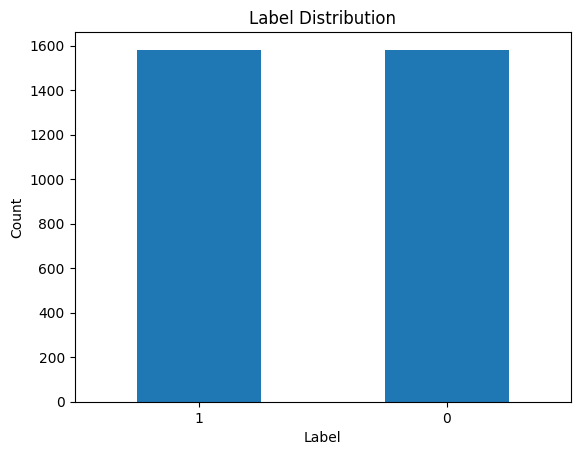

In [ ]:
analyze_dataframe(df2, title='DataFrame 2')
plot_dataframe(df2, 'class', title='DataFrame 2')

**==> DF3**

In [ ]:
df3 = remove_column(df3, 'Unnamed: 0')
df3 = rename_columns(df3, {'comment': 'text', 'off': 'class'})
df3 = basic_cleaning(df3, 'text')
df3 = encode_dataframe(df3, 'class', {1: '1', 0: '0'})
df3 = balance_dataframe(df3, 'class', -1)


DataFrame 3 Analysis:
Length: 5794 rows
Columns: Index(['text', 'class'], dtype='object')

Descriptive Statistics:
                                                     text class
count                                                5794  5794
unique                                               5777     2
top     ردة فعل زوجك الاولى كانت طبيعية ونابعة من رجول...     1
freq                                                    2  2897

DataFrame 3 Plot:


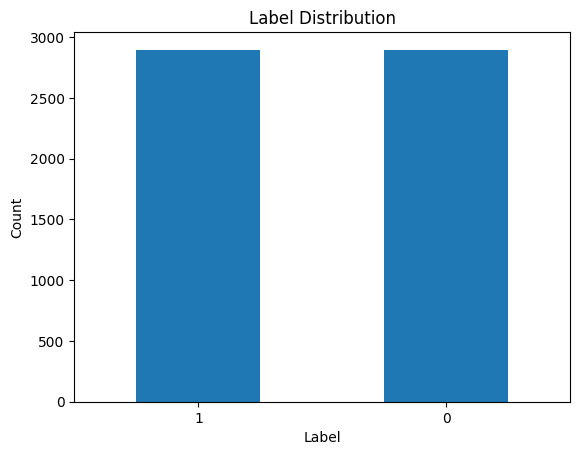

In [ ]:
analyze_dataframe(df3, title='DataFrame 3')
plot_dataframe(df3, 'class', title='DataFrame 3')

**==> DF4**

In [ ]:
df4 = remove_column(df4, 'Unnamed: 0')
df4 = rename_columns(df4, {'comment': 'text', 'off': 'class'})
df4 = basic_cleaning(df4, 'text')
df4 = encode_dataframe(df4, 'class', {1: '1', 0: '0'})
df4 = balance_dataframe(df4, 'class', -1)


DataFrame 4 Analysis:
Length: 1416 rows
Columns: Index(['text', 'class'], dtype='object')

Descriptive Statistics:
                                                     text class
count                                                1416  1416
unique                                               1416     2
top     سير اصحبي دير الرقية الشرعية راسك راك مريض امس...     1
freq                                                    1   708

DataFrame 4 Plot:


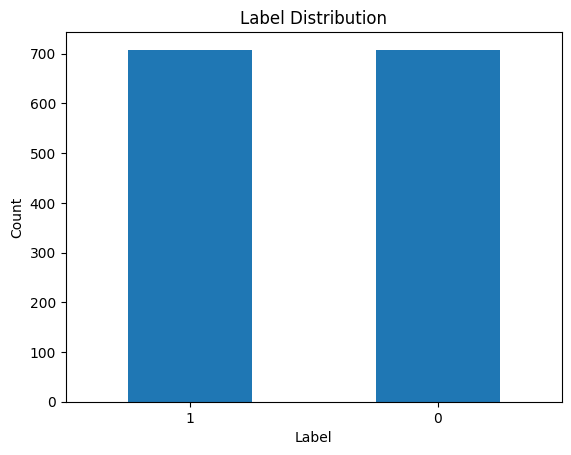

In [ ]:
analyze_dataframe(df4, title='DataFrame 4')
plot_dataframe(df4, 'class', title='DataFrame 4')

# Final Dataset

In [ ]:
def merge_dataframes(dfs):
    """
    Balence the dataframe by [under-sampling the majority/oversampling the minority] class

    Parameters:
    - dfs: List of Pandas DataFrames to merge

    Returns:
    - Merged Pandas DataFrame
    """

    merged_df = pd.concat(dfs, ignore_index=True)
    merged_df = merged_df.drop_duplicates()

    return merged_df




In [ ]:
df = merge_dataframes([df1, df2, df3, df4])
df.head()

,text,class
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,0
1,منتوج رائع وثمن مناسب ....جميل,0
2,كلنا ابن كيران لمتافق معايا يدير جيم,0
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,0
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,0



Final DataFrame Analysis:
Length: 12248 rows
Columns: Index(['text', 'class'], dtype='object')

Descriptive Statistics:
                                                     text  class
count                                               12248  12248
unique                                              12219      2
top     حسبنا الله ونعم الوكيل خوتي هذي راه علامة السا...      0
freq                                                    2   6134

Final DataFrame Plot:


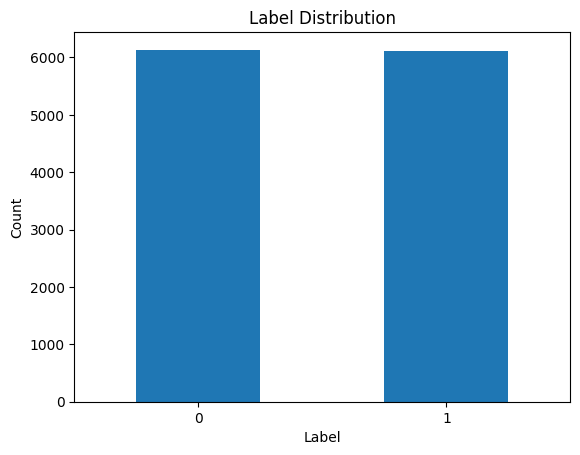

In [ ]:
analyze_dataframe(df, title='Final DataFrame')
plot_dataframe(df, 'class', title='Final DataFrame')

**==> Export DataFrame**

In [ ]:
df.to_csv('Dataset/data.csv', encoding='utf-8', index=False)

This is the final Dataset to work on. Next step involves more ingestigations and cleaning on the data, especially 'text' column.


---

In [ ]:
!pip install nltk

In [ ]:
!pip install pydoda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.8/875.8 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydoda: filename=pydoda-1.0.3-py3-none-any.whl size=883131 sha256=7318328e9badc06a6e10dfea3498d356583a3181bb3901daa49d4ffc49b7d89f
  Stored in directory: /root/.cache/pip/wheels/4a/e2/92/1248d8e2176d9d44046788e883aba6ea55d4f4ccc3800155db
Successfully built pydoda


In [ ]:
!pip install pyarabic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 1.3 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.corpus import stopwords

# Download nltk resources
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import pyarabic.araby as araby
import pyarabic.trans as trans
from pydoda import Pydoda
from pydoda import Category
# import pyarabic.number as number

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,text,class
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,0
1,منتوج رائع وثمن مناسب ....جميل,0
2,كلنا ابن كيران لمتافق معايا يدير جيم,0
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,0
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,0


In [ ]:
emodf = pd.read_csv('emojis.csv')
emodf.head()

,emoji,text
0,🎃,جاك فانوس
1,🎄,شجرة عيد الميلاد
2,🎆,العاب ناريه
3,🎇,الماسة
4,🧨,مفرقعة نارية


In [ ]:
def create_emoji_mapping(df):
    """
    Create a mapping dictionary from a DataFrame containing emojis and labels.

    Parameters:
    - df: DataFrame with 'Emoji' and 'Label' columns

    Returns:
    - Dictionary mapping emojis to labels
    """
    emoji_mapping = dict(zip(df['emoji'], df['text']))
    return emoji_mapping

def translate_emoji(text, emoji_mapping):
    """
    Replace emojis in a given text with their corresponding labels based on a mapping dictionary.

    Parameters:
    - text: Input text
    - emoji_mapping: Dictionary mapping emojis to labels

    Returns:
    - Text with emojis replaced by labels
    """
    for emoji_char, label in emoji_mapping.items():
        text = text.replace(emoji_char, ' '+label+' ')

    return text


def normalize_hashtags(text):
    """
     hashtags processing by removing hashtag and replacing underscore '_' by space ' ' in order to keep the words

    Parameters:
    - text: Input text

    Returns:
    - Cleaned text
    """
    hashtag_pattern = re.compile(r'#(\w+)')
    matches = hashtag_pattern.findall(text)
    for match in matches:
        original_hashtag = '#' + match
        transformed_text = match.replace('_', ' ')
        text = text.replace(original_hashtag, transformed_text)

    return text



def clean_text(text):
    """
     text processing steps version 1, including removing URLs, translating emojis,
     normalizing digits, keeping only Arabic characters, removing extra whitespaces,
     and cleaning up various Arabic text features.

    Parameters:
    - text: Input text

    Returns:
    - Cleaned text
    """

    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE) # remove URLs
    text = translate_emoji(text, emoji_mapping) # emojis to arabic ❤️ to قلب أحمر
    text = trans.normalize_digits(text, source='all', out='west') # Eastern/Persian numbers to Weastern numbers : ۰۱۲۳۴۵۶۷۸۹ ٠١٢٣٤٥٦٧٨٩ to 123456789
    text = normalize_hashtags(text) # في_المزيد# to في المزيد
    text = re.sub(r'\s?@\w+\s?', ' ', text) # remove tags like @user
    text = re.sub(r"[^\u0600-\u06FF\s]", " ", text) # keep only Arabic characters
    text = araby.strip_tashkeel(text) # remove arabic tashkeel : الْعَرَبِيّةُ
    text = araby.strip_diacritics(text) # remove arabic decorations : الرّحمٰن
    text = araby.strip_tatweel(text) # remove arabic tatweel : العـــــربية
    text = re.sub(r"(.)\1+", r"\1", text) #remove repeated chars : مممممملفففف to ملف
    text = ''.join([char for char in text if char not in ['،', '؛', '؟']]) # remove specific arabic punctuation marks like '،', '؛', '؟'
    text = re.sub(r"\s+", " ", text).strip() # remove extra whitespaces

    return text

def derrej(text):
    """
    Replace English letters with their corresponding Arabic letters

    Parameters:
    - text: Text written in english letters

    Returns:
    - Text written in Arabic letters
    """

    english_arabic_mapping = {
        'a': 'ا',
        'b': 'ب',
        'c': 'س',
        'd': 'د',
        'e': '',
        'f': 'ف',
        'g': 'ج',
        'h': 'ه',
        'i': 'ي',
        'j': 'ج',
        'k': 'ك',
        'l': 'ل',
        'm': 'م',
        'n': 'ن',
        'o': 'و',
        'p': 'ب',
        'q': 'ق',
        'r': 'ر',
        's': 'س',
        't': 'ت',
        'u': 'ي',
        'v': 'ف',
        'w': 'و',
        'x': 'خ',
        'y': 'ي',
        'z': 'ز',
        'T': 'ط',
        'S': 'ص',
        'D': 'ض',
        'kh': 'خ',
        'ch': 'ش',
        'gh': 'غ',
        'ou': 'و',
        '3': 'ع',
        '7': 'ح',
        '9': 'ق',
        '8': 'ه',
        '2': 'ء',
        '5': 'خ',
        '4': 'غ',
    }

    # Replace English letters with Arabic letters
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'\d{3,}', '', text) # remove numbers to not confuse with letters
    arabic_text = ''
    i = 0
    while i < len(text):
        char = text[i]
        if i < len(text) - 1 and (char + text[i + 1]) in english_arabic_mapping:
            arabic_text += english_arabic_mapping[char + text[i + 1]]
            i += 2
        else:
            arabic_text += english_arabic_mapping.get(char, char)
            i += 1

    return arabic_text


def detect_text_lang(text, threshold=0.65):
    """
    Detect whether the text is written in arabic or english letters,
    Remove all numbers, whitespaces, and special chararachters,
    then Replace English letters with their corresponding Arabic letters,
    if English letters pourcentage is more than a threshold

    Parameters:
    - text: Text written in english letters
    - threshold: float pourcentage of

    Returns:
    - -1 if English, 1 if Arabic, 0 if Mixed
    """
    arabic_letters = set("ابتثجحخدذرزسشصضطظعغفقكلمنهويءآأإئىة")
    english_letters = set("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ")

    text = ''.join(char for char in text if char.isalpha())
    total_chars = len(text)
    arabic_count = sum(1 for char in text if char in arabic_letters)
    english_count = sum(1 for char in text if char in english_letters)

    arabic_percentage = arabic_count / total_chars
    english_percentage = english_count / total_chars

    if arabic_percentage > threshold:
        return 1
    elif english_percentage > threshold:
        return -1
    else:
        return 0


def stop_words_removal(line):
    """
    Removes Stop Words in a tokenized senetnce

    Parameters:
    - line: list of words

    Returns:
    - list of words without Stop Words
    """
    return line.remove(all_stop_words)


def get_doda_sw(category, theme, sense_words=[]):
  """
    Create a list of stop words from a theme from a category using doda api,
    Except a list of words that may have sense

    Parameters:
    - category: category to get theme from
    - theme: theme to get darija words from
    - sense_words: words to ignore, default nothing []

    Returns:
    - list of stop words from the specific theme
    """
  sw = [Category(category, theme).get_darija_variations(x) for x in Category(category, theme).get_english_words()]
  sw = [derrej(value) if isinstance(value, str) else value for word_variations in sw for value in word_variations.values()]
  sw = [item for item in sw if item not in sense_words]
  sw = list(filter(None, set(sw)))
  sw = [clean_text(item) for item in sw]
  return sw


In [ ]:
# emojis
emoji_mapping = create_emoji_mapping(emodf)

# Stop words from list.txt
swdf = pd.read_csv('list.txt', header=None, names=['sw'])
swdf['clean_sw'] = swdf['sw'].apply(clean_text)
swdf['clean_norm_sw'] = swdf['clean_sw'].apply(araby.normalize_hamza) # hhhhhh normalize meeeee

# Stop words from Doda
numbers_sw = get_doda_sw('semantic', 'numbers')
food_sw = get_doda_sw('semantic', 'food', ['فريز'])
clothes_sw = get_doda_sw('semantic', 'clothes', ["تقاشر"])
colors_sw = get_doda_sw('semantic', 'colors', ['زرق', 'زراق'])
pronouns_sw = get_doda_sw('syntactic', 'pronouns')
adverbs_sw = get_doda_sw('syntactic', 'adverbs', ['ليلاساف', 'ماشي'])

# stop words
arabic_stop_words = set(stopwords.words('arabic'))
all_stop_words = list(arabic_stop_words) + list(swdf['sw']) + numbers_sw + food_sw + clothes_sw + colors_sw + pronouns_sw + adverbs_sw
all_stop_words = list(set(all_stop_words))
all_stop_words = [item for item in all_stop_words if item not in ['لم', 'ه', 'لا']]


In [ ]:
# add cleaned text column
df['cleaned_text'] = df['text'].apply(clean_text)
df.head()

,text,class,cleaned_text
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...
1,منتوج رائع وثمن مناسب ....جميل,0,منتوج رائع وثمن مناسب جميل
2,كلنا ابن كيران لمتافق معايا يدير جيم,0,كلنا ابن كيران لمتافق معايا يدير جيم
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,0,وفقك اله لولاية اخرى حقاش مكينش محسن منك
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,0,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...


In [ ]:
df.to_csv('cleaned_data.csv', encoding='utf-8', index=False)

# Corpus Collection & Construction

In [ ]:
# !pip install PyFarasa

In [ ]:
!pip install farasapy

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head()


,text,class,cleaned_text
0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...,0,طوال حياتي لم المس اي تغير حتى قدمت هذه الحكوم...
1,منتوج رائع وثمن مناسب ....جميل,0,منتوج رائع وثمن مناسب جميل
2,كلنا ابن كيران لمتافق معايا يدير جيم,0,كلنا ابن كيران لمتافق معايا يدير جيم
3,وفقك الله لولاية اخرى حقاش مكينش محسن منك,0,وفقك اله لولاية اخرى حقاش مكينش محسن منك
4,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...,0,لأنه و بكل بساطة رئيس الحكومة يعتني بمعاق داخل...


In [ ]:
from farasa.stemmer import FarasaStemmer
stemmer = FarasaStemmer()
# stemmer.stem(df['cleaned_text'][i])

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'farasa-api.qcri.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


100%|██████████| 241M/241M [03:28<00:00, 1.16MiB/s]


In [ ]:
# ignored this step ==> 10s per row : ~33h/dataset
corpus = []

for i in range(len(df)):
  if (i + 1) % 10 == 0:
        print(i)
  corpus.append(" ".join([word for word in araby.tokenize(stemmer.stem(df['cleaned_text'][i])) if word not in all_stop_words]))

# only for time saving purpose
# add stemmed text column
df['stemmed_text'] = corpus
df.head()

df.to_csv('stemmed_data.csv', encoding='utf-8', index=False)

In [3]:
df = df.dropna(subset=['cleaned_text'])
len(df)

12243

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(df["cleaned_text"], df["class"], test_size=0.3, random_state=42, stratify=df['class'])
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Models

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Create separate pipelines for each model
nb_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', MultinomialNB())
])

logreg_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', LogisticRegression())
])

xgb_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', XGBClassifier())
])

# Create dictionaries for pipelines and corresponding parameters
pipelines = {
    'Naive Bayes': nb_pipeline,
    'Logistic Regression': logreg_pipeline,
    'XGBoost': xgb_pipeline
}

param_grids = {
    'Naive Bayes': {'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                   'vectorizer__max_df': [0.5],
                   'model__alpha': [0.5, 1.0, 2.0],
                   'model__fit_prior': [True, False]},

    'Logistic Regression': {'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                            'vectorizer__max_df': [0.5],
                            'model__C': [0.5, 1.0, 2.0],
                            'model__penalty': ['l2']},

    'XGBoost': {'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                'vectorizer__max_df': [0.5],
                'model__n_estimators': [50, 100, 200],
                'model__max_depth': [3, 6, 9],
                'model__learning_rate': [0.01, 0.1, 0.2]}
}

# Perform GridSearchCV for each model
for model_name in pipelines.keys():
    grid_search = GridSearchCV(pipelines[model_name], param_grids[model_name], cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the validation set
    y_val_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    report = classification_report(y_val, y_val_pred)

    print(f"\nBest Hyperparameters for {model_name}: ", best_params)
    print(f"Validation Accuracy for {model_name}: {accuracy}")
    print(f"Classification Report for {model_name}:\n", report)

    # Once you have the best model, evaluate it on the test set
    y_test_pred = best_model.predict(X_test)

    # Evaluate the best model on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)

    print("\nFinal Test Accuracy for {}: {}".format(model_name, test_accuracy))
    print("Final Test Classification Report for {}:\n".format(model_name), test_report)



Best Hyperparameters for Naive Bayes:  {'model__alpha': 0.5, 'model__fit_prior': False, 'vectorizer__max_df': 0.5, 'vectorizer__ngram_range': (1, 2)}
Validation Accuracy for Naive Bayes: 0.7434640522875817
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       908
           1       0.74      0.76      0.75       928

    accuracy                           0.74      1836
   macro avg       0.74      0.74      0.74      1836
weighted avg       0.74      0.74      0.74      1836


Final Test Accuracy for Naive Bayes: 0.733260751224823
Final Test Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73       945
           1       0.71      0.77      0.74       892

    accuracy                           0.73      1837
   macro avg       0.73      0.73      0.73      1837
weighted avg       0.74      0.73      0.73    

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Create a pipeline for SVM
svm_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', SVC())
])

# Define the parameter grid for SVM
svm_param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vectorizer__max_df': [0.5],
    'model__C': [0.1, 1, 10],  # Regularization parameter
    'model__kernel': ['linear', 'rbf'],  # Kernel type
}

# Perform GridSearchCV for SVM
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=3, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

best_svm_params = svm_grid_search.best_params_
best_svm_model = svm_grid_search.best_estimator_

# Evaluate the best SVM model on the validation set
y_val_pred_svm = best_svm_model.predict(X_val)
accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
report_svm = classification_report(y_val, y_val_pred_svm)

print("\nBest Hyperparameters for SVM: ", best_svm_params)
print("Validation Accuracy for SVM: ", accuracy_svm)
print("Classification Report for SVM:\n", report_svm)

# Once you have the best SVM model, evaluate it on the test set
y_test_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best SVM model on the test set
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
test_report_svm = classification_report(y_test, y_test_pred_svm)

print("\nFinal Test Accuracy for SVM: ", test_accuracy_svm)
print("Final Test Classification Report for SVM:\n", test_report_svm)



Best Hyperparameters for SVM:  {'model__C': 1, 'model__kernel': 'rbf', 'vectorizer__max_df': 0.5, 'vectorizer__ngram_range': (1, 2)}
Validation Accuracy for SVM:  0.721677559912854
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70       909
           1       0.70      0.78      0.74       927

    accuracy                           0.72      1836
   macro avg       0.72      0.72      0.72      1836
weighted avg       0.72      0.72      0.72      1836


Final Test Accuracy for SVM:  0.7327163854109962
Final Test Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       930
           1       0.71      0.79      0.74       907

    accuracy                           0.73      1837
   macro avg       0.74      0.73      0.73      1837
weighted avg       0.74      0.73      0.73      1837



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Create separate pipelines for each model
nb_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', MultinomialNB())
])

logreg_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', LogisticRegression())
])


# Create dictionaries for pipelines and corresponding parameters
pipelines = {
    'Naive Bayes': nb_pipeline,
    'Logistic Regression': logreg_pipeline
}

param_grids = {
    'Naive Bayes': {'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                   'vectorizer__max_df': [0.5],
                   'model__alpha': [0.5, 1.0, 2.0],
                   'model__fit_prior': [True, False]},

    'Logistic Regression': {'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                            'vectorizer__max_df': [0.5],
                            'model__C': [0.5, 1.0, 2.0],
                            'model__penalty': ['l2']}
}

# Perform GridSearchCV for each model
for model_name in pipelines.keys():
    grid_search = GridSearchCV(pipelines[model_name], param_grids[model_name], cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the validation set
    y_val_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    report = classification_report(y_val, y_val_pred)

    print(f"\nBest Hyperparameters for {model_name}: ", best_params)
    print(f"Validation Accuracy for {model_name}: {accuracy}")
    print(f"Classification Report for {model_name}:\n", report)

    # Once you have the best model, evaluate it on the test set
    y_test_pred = best_model.predict(X_test)

    # Evaluate the best model on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)

    print("\nFinal Test Accuracy for {}: {}".format(model_name, test_accuracy))
    print("Final Test Classification Report for {}:\n".format(model_name), test_report)



Best Hyperparameters for Naive Bayes:  {'model__alpha': 0.5, 'model__fit_prior': False, 'vectorizer__max_df': 0.5, 'vectorizer__ngram_range': (1, 2)}
Validation Accuracy for Naive Bayes: 0.7374727668845316
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74       909
           1       0.74      0.73      0.74       927

    accuracy                           0.74      1836
   macro avg       0.74      0.74      0.74      1836
weighted avg       0.74      0.74      0.74      1836


Final Test Accuracy for Naive Bayes: 0.7621121393576483
Final Test Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       930
           1       0.75      0.78      0.76       907

    accuracy                           0.76      1837
   macro avg       0.76      0.76      0.76      1837
weighted avg       0.76      0.76      0.76   

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create a pipeline for MLP
mlp_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', MLPClassifier())
])

# Define the parameter grid for MLP
mlp_param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vectorizer__max_df': [0.5],
    'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Specify the number of neurons in each hidden layer
    'model__activation': ['relu', 'tanh'],  # Activation function
    'model__alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
}

# Perform GridSearchCV for MLP
mlp_grid_search = GridSearchCV(mlp_pipeline, mlp_param_grid, cv=3, scoring='accuracy')
mlp_grid_search.fit(X_train, y_train)

best_mlp_params = mlp_grid_search.best_params_
best_mlp_model = mlp_grid_search.best_estimator_

# Evaluate the best MLP model on the validation set
y_val_pred_mlp = best_mlp_model.predict(X_val)
accuracy_mlp = accuracy_score(y_val, y_val_pred_mlp)
report_mlp = classification_report(y_val, y_val_pred_mlp)

print("\nBest Hyperparameters for MLP: ", best_mlp_params)
print("Validation Accuracy for MLP: ", accuracy_mlp)
print("Classification Report for MLP:\n", report_mlp)

# Once you have the best MLP model, evaluate it on the test set
y_test_pred_mlp = best_mlp_model.predict(X_test)

# Evaluate the best MLP model on the test set
test_accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)
test_report_mlp = classification_report(y_test, y_test_pred_mlp)

print("\nFinal Test Accuracy for MLP: ", test_accuracy_mlp)
print("Final Test Classification Report for MLP:\n", test_report_mlp)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, SimpleRNN, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad sequences
max_words = 1000  # Maximum number of words in the vocabulary
max_len = 50  # Maximum length of each sequence

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Define different hyperparameters and architectures to experiment with
hyperparameter_sets = [
    {'embedding_dim': 50, 'dropout_rate': 0.2, 'conv_filters': 32, 'kernel_size': 3, 'architecture': 'CNN'},
    {'embedding_dim': 100, 'dropout_rate': 0.3, 'recurrent_units': 16, 'architecture': 'SimpleRNN'},
    {'embedding_dim': 50, 'dropout_rate': 0.3, 'recurrent_units': 16, 'architecture': 'LSTM'},
]

for params in hyperparameter_sets:
    # Build a neural network model based on the specified architecture
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=params['embedding_dim'], input_length=max_len))

    if params['architecture'] == 'CNN':
        model.add(Conv1D(filters=params['conv_filters'], kernel_size=params['kernel_size'], activation='relu'))
        model.add(MaxPooling1D())
        model.add(Flatten())
    elif params['architecture'] == 'SimpleRNN':
        model.add(SimpleRNN(params['recurrent_units'], activation='relu'))
    elif params['architecture'] == 'LSTM':
        model.add(LSTM(params['recurrent_units'], activation='relu'))

    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_val_pad, y_val))

    # Evaluate the model on the test set
    y_test_pred = (model.predict(X_test_pad) > 0.5).astype(int)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)

    print("\nHyperparameters:", params)
    print("Final Test Accuracy: ", test_accuracy)
    print("Final Test Classification Report:\n", test_report)


Epoch 1/5
268/268 [==============================] - 2s 5ms/step - loss: 0.6669 - accuracy: 0.5763 - val_loss: 0.6168 - val_accuracy: 0.6400
Epoch 2/5
268/268 [==============================] - 1s 4ms/step - loss: 0.5483 - accuracy: 0.7011 - val_loss: 0.5970 - val_accuracy: 0.6596
Epoch 3/5
268/268 [==============================] - 1s 4ms/step - loss: 0.5041 - accuracy: 0.7410 - val_loss: 0.6086 - val_accuracy: 0.6536
Epoch 4/5
268/268 [==============================] - 1s 4ms/step - loss: 0.4745 - accuracy: 0.7608 - val_loss: 0.6168 - val_accuracy: 0.6580
Epoch 5/5
58/58 [==============================] - 0s 2ms/step

Hyperparameters: {'embedding_dim': 50, 'dropout_rate': 0.2, 'conv_filters': 32, 'kernel_size': 3, 'architecture': 'CNN'}
Final Test Accuracy:  0.6597713663581927
Final Test Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65       930
           1       0.64      0.70      0.67       907

    accurac



---



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Combine the original training, validation, and test sets
X_full = pd.concat([X_train, X_val, X_test], axis=0)
y_full = pd.concat([y_train, y_val, y_test], axis=0)

# Create a pipeline with the best hyperparameters
final_nb_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), max_df=0.5)),
    ('model', MultinomialNB(alpha=0.5, fit_prior=False))
])

# Fit the final model on the entire dataset
final_nb_pipeline.fit(X_full, y_full)

# Predictions on the test set
y_test_pred_final = final_nb_pipeline.predict(X_test)

# Evaluate the final model on the test set
accuracy_test_final = accuracy_score(y_test, y_test_pred_final)
report_test_final = classification_report(y_test, y_test_pred_final)

print("Final Test Accuracy: ", accuracy_test_final)
print("Final Test Classification Report:\n", report_test_final)


Final Test Accuracy:  0.9858464888405009
Final Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       930
           1       0.98      0.99      0.99       907

    accuracy                           0.99      1837
   macro avg       0.99      0.99      0.99      1837
weighted avg       0.99      0.99      0.99      1837



['dcsa-x.joblib']

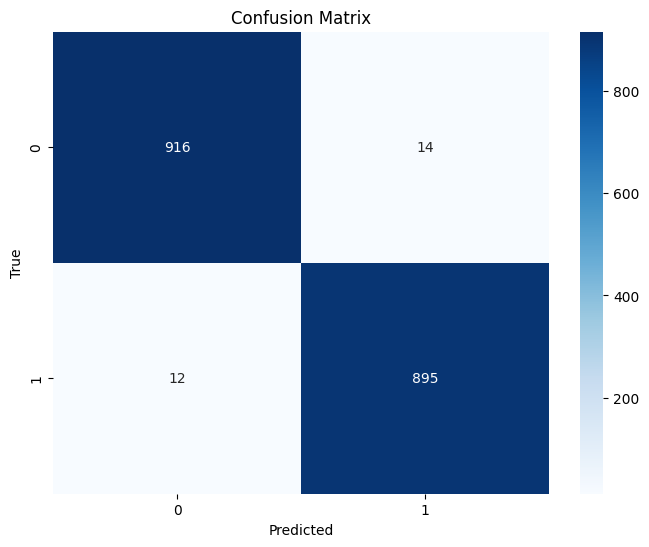

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred_final)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



---



# LLMs

In [3]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.6 MB/s eta 0:00:00


In [4]:
!pip install transformers[torch] -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [9]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.0 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
sa = pipeline('text-classification', model='CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment')
sentences = ['أنا بخير', 'أنا لست بخير']
sa(sentences)

config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/305k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': 'positive', 'score': 0.8008126616477966},
 {'label': 'negative', 'score': 0.6131935715675354}]



---



In [4]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer

In [5]:
model = TFAutoModel.from_pretrained("bert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [6]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [7]:
def tokenize(batch):
    return tokenizer(batch["cleaned_text"], padding=True, truncation=True)

In [8]:
from datasets import DatasetDict, Dataset


# Split the DataFrame into train, test, and validation sets
train_df, test_df, val_df = df[:10000], df[10000:11000], df[11000:]

# Create Datasets from the DataFrames
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)
val_dataset = Dataset.from_pandas(val_df)

# Create a DatasetDict
dataset_dict = DatasetDict({
    "train": train_dataset,
    "test": test_dataset,
    "validation": val_dataset,
})

# Print information about the DatasetDict
print(dataset_dict)


DatasetDict({
    train: Dataset({
        features: ['text', 'class', 'cleaned_text', '__index_level_0__'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['text', 'class', 'cleaned_text', '__index_level_0__'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['text', 'class', 'cleaned_text', '__index_level_0__'],
        num_rows: 1243
    })
})


In [9]:
dcsa_encoded = dataset_dict.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1243 [00:00<?, ? examples/s]

In [10]:
dcsa_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'class', 'cleaned_text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['text', 'class', 'cleaned_text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['text', 'class', 'cleaned_text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1243
    })
})

In [11]:
# setting 'input_ids', 'attention_mask', 'token_type_ids', and 'label'
# to the tensorflow format. Now if you access this dataset you will get these
# columns in `tf.Tensor` format

dcsa_encoded.set_format('tf',
                            columns=['input_ids', 'attention_mask', 'token_type_ids', 'class'])

# setting BATCH_SIZE to 8/64.
BATCH_SIZE = 8

def order(inp):
    '''
    This function will group all the inputs of BERT
    into a single dictionary and then output it with
    labels.
    '''
    data = list(inp.values())
    return {
        'input_ids': data[1],
        'attention_mask': data[2],
        'token_type_ids': data[3]
    }, data[0]

# converting train split of `emotions_encoded` to tensorflow format
train_dataset = tf.data.Dataset.from_tensor_slices(dcsa_encoded['train'][:])
# set batch_size and shuffle
train_dataset = train_dataset.batch(BATCH_SIZE).shuffle(1000)
# map the `order` function
train_dataset = train_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

# ... doing the same for test set ...
test_dataset = tf.data.Dataset.from_tensor_slices(dcsa_encoded['test'][:])
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

In [12]:
inp, out = next(iter(train_dataset)) # a batch from train_dataset
print(inp, '\n\n', out)

{'input_ids': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
array([[  101,  1270, 15915, ...,     0,     0,     0],
       [  101,  1295, 15915, ...,     0,     0,     0],
       [  101,  1274, 29836, ...,     0,     0,     0],
       ...,
       [  101,  1295, 23673, ...,     0,     0,     0],
       [  101,  1270, 23673, ...,     0,     0,     0],
       [  101,  1270, 15915, ...,     0,     0,     0]])>, 'attention_mask': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>, 'token_type_ids': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>} 

 tf.Tensor([1 1 1 1 1 1 1 1], shape=(8,

In [13]:
class BERTForClassification(tf.keras.Model):

    def __init__(self, bert_model, num_classes):
        super().__init__()
        self.bert = bert_model
        self.fc = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.bert(inputs)[1]
        return self.fc(x)

In [14]:
classifier = BERTForClassification(model, num_classes=2)

classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [15]:
history = classifier.fit(
    train_dataset,
    epochs=1
)

1250/1250 [==============================] - 1291s 983ms/step - loss: 3.2294 - accuracy: 0.4972


In [16]:
classifier.evaluate(test_dataset)

125/125 [==============================] - 43s 321ms/step - loss: 0.4249 - accuracy: 0.9280


[0.4249444603919983, 0.9279999732971191]

In [21]:
classifier.metrics

In [22]:
import tensorflow as tf
from transformers import AutoTokenizer


# Example sentences to predict
input_sentences = ["تفو علا كمامر", "شكرا يا محمد السادس...♥",
                   "الله ينعل بو الفلوس تفو على حياة", "فيه الانوتة كتر مني",
                   "كذاب هي ضحية كلب مسكينه"]

tokenized_inputs = tokenizer(input_sentences, padding=True, truncation=True, return_tensors="tf")

# Convert BatchEncoding to a hashable tuple
input_tuple = (
    tokenized_inputs["input_ids"].numpy(),
    tokenized_inputs["token_type_ids"].numpy(),
    tokenized_inputs["attention_mask"].numpy(),
)

# Make predictions using the loaded BERT model
predictions = classifier.predict(input_tuple)

# Convert softmax output to predicted class labels
predicted_labels = tf.argmax(predictions, axis=1)

# Print the raw predictions and predicted labels
print("Raw Predictions:", predictions)
print("Predicted Labels:", predicted_labels.numpy())


1/1 [==============================] - 0s 95ms/step
Raw Predictions: [[0.9971641  0.00283588]
 [0.9971641  0.00283588]
 [0.9971641  0.00283588]
 [0.9971641  0.00283588]
 [0.9971641  0.00283588]]
Predicted Labels: [0 0 0 0 0]


In [23]:
classifier.save('distiB-dcsa')



---



In [ ]:
import pandas as pd
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
from transformers import EarlyStoppingCallback
import tensorflow as tf

# Load data
data = pd.read_csv("cleaned_data.csv")

# Tokenize text
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(data["cleaned_text"].tolist(), truncation=True, padding=True)

# Split into training and validation sets
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(
    train_encodings['input_ids'], data["class"], test_size=0.2
)

# Load pre-trained DistilBERT model
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Define optimizer and early stopping
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
early_stopping = EarlyStoppingCallback(patience=3)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (with early stopping)
model.fit(
    train_inputs, train_labels, epochs=3, batch_size=8,
    validation_data=(validation_inputs, validation_labels),
    callbacks=[early_stopping]
)

# Evaluate the model on the validation set
model.evaluate(validation_inputs, validation_labels)


# Export & Import

In [ ]:
from joblib import dump

joblib.dump(final_nb_pipeline, 'dcsa-x.joblib')

In [ ]:
from joblib import load

loaded_model = load('dcsa-x.joblib')

In [ ]:
# Example sentences to predict
new_sentences = ["يا ربي السلامة الله يحفظنا ويحفظ وليداتنا والله ياخد فيهم الحق", "شكرا يا محمد السادس...♥", "الله ينعل بو الفلوس تفو على حياة"
"فيه الانوتة كتر مني", "كذاب هي ضحية كلب مسكينه", ]
cleaned_ns = [clean_text(text) for text in new_sentences]

# Use the loaded model to make predictions
new_predictions = loaded_model.predict(new_sentences)

# Print the predictions
for sentence, prediction in zip(new_sentences, new_predictions):
    print(f"Sentence: {sentence}\nPredicted Sentiment: {prediction}\n")


Sentence: يا ربي السلامة الله يحفظنا ويحفظ وليداتنا والله ياخد فيهم الحق
Predicted Sentiment: 0

Sentence: شكرا يا محمد السادس...♥
Predicted Sentiment: 0

Sentence: الله ينعل بو الفلوس تفو على حياةفيه الانوتة كتر مني
Predicted Sentiment: 1

Sentence: كذاب هي ضحية كلب مسكينه
Predicted Sentiment: 1



# Utils

In [ ]:
from pydoda import Pydoda

# Create an instance of Pydoda
pydoda = Pydoda()

# Retrieve all available categories
categories = pydoda.all()

# Print the categories in a user-friendly format
for category_type, category_list in categories.items():
    print(f"{category_type.capitalize()} Categories:")
    for category in category_list:
        print(f"- {category}")
    print()

In [ ]:
text = "bkhir 12? سلام ❤️"

if detect_text_lang(text)==-1:
  text = derrej(text)
  text = clean_text(text)
elif detect_text_lang(text)==1:
  text = clean_text(text)
else:
  text = "NOOOO"
print(text)

In [ ]:
for i in range(1200, 1220):
  print(df['text'][i])
  print([word for word in araby.tokenize(df['cleaned_text'][i]) if word not in all_stop_words])
  print('--------------------')

In [ ]:
print(df['cleaned_text'][0])
print(stemmer.stem(df['cleaned_text'][0]))
" ".join([word for word in araby.tokenize(stemmer.stem(df['cleaned_text'][0])) if word not in all_stop_words])